In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import model_selection
%matplotlib inline

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Thesis/Diabetes Dataset/df_train_folds.csv')
df_test = pd.read_csv('/content/gdrive/MyDrive/Thesis/Diabetes Dataset/df_test_folds.csv')

In [ ]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'Positive' else 0)
df

Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     30    Male       No         No                 No       No         No   
1     48    Male      Yes        Yes                Yes       No        Yes   
2     58    Male       No         No                 No      Yes         No   
3     34  Female      Yes        Yes                 No      Yes         No   
4     38    Male       No         No                 No       No         No   
..   ...     ...      ...        ...                ...      ...        ...   
411   36  Female       No         No                 No      Yes         No   
412   53    Male      Yes         No                Yes       No         No   
413   27    Male       No         No                 No       No         No   
414   28  Female       No         No                 No       No        Yes   
415   30    Male      Yes        Yes                Yes      Yes         No   

    Genital thrush visual blurring Itching Irritability delayed healing  \
0               No              No      No           No              No   
1              Yes              No      No           No             Yes   
2               No              No     Yes           No             Yes   
3               No              No      No          Yes              No   
4               No              No      No           No              No   
..             ...             ...     ...          ...             ...   
411             No              No      No          Yes              No   
412             No              No      No           No             Yes   
413             No              No      No           No              No   
414             No              No      No           No              No   
415            Yes              No      No           No             Yes   

    partial paresis muscle stiffness Alopecia Obesity  class  kfold  
0                No               No       No      No      0    0.0  
1                No               No       No      No      1    4.0  
2                No              Yes      Yes      No      0    3.0  
3                No              Yes       No      No      1    1.0  
4                No               No       No      No      0    3.0  
..              ...              ...      ...     ...    ...    ...  
411              No               No       No      No      0    0.0  
412             Yes               No       No      No      1    0.0  
413              No               No       No      No      0    4.0  
414             Yes               No       No      No      0    0.0  
415              No               No       No      No      1    4.0  

[416 rows x 18 columns]

In [ ]:
useful_features = [c for c in df.columns if c not in ['class','kfold']]
len(useful_features)
categorical_cols = [c for c in df.columns if c not in ['class','kfold','Age']]
df_test = df_test[useful_features]
len(categorical_cols)

15

In [ ]:
numerical_cols = ['Age']

In [ ]:
final_preds2 = []
for fold in range(5):
  xtrain = df[df.kfold != fold].reset_index(drop = True)
  xvalid = df[df.kfold == fold].reset_index(drop= True)
  xtest = df_test.copy(deep =True)
  
  ytrain = xtrain['class']
  yvalid = xvalid['class']

  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]

  # print("OneHot Encoding")
  # ohe = OneHotEncoder(sparse= False, handle_unknown="ignore")
  # xtrain_ohe = ohe.fit_transform(xtrain[categorical_cols])
  # xvalid_ohe = ohe.transform(xvalid[categorical_cols])
  # xtest_ohe = ohe.transform(xtest[categorical_cols])
  # print("ohe len =", xtrain_ohe.shape)

  # xtrain_ohe = pd.DataFrame(xtrain_ohe, columns = [f"ohe_{i}" for i in range(xtrain_ohe.shape[1])])
  # xvalid_ohe = pd.DataFrame(xvalid_ohe, columns = [f"ohe_{i}" for i in range(xvalid_ohe.shape[1])])
  # xtest_ohe = pd.DataFrame(xtest_ohe, columns = [f"ohe_{i}" for i in range(xtest_ohe.shape[1])])

  xtrain = pd.concat([xtrain, xtrain_ohe], axis =1)
  xvalid = pd.concat([xvalid, xtrain_ohe], axis =1)
  xtest = pd.concat([xtest, xtrain_ohe], axis =1)

  print("Standardizing")
  std_scalar = StandardScaler()
  xtrain[numerical_cols] = std_scalar.fit_transform(xtrain[numerical_cols])
  xvalid[numerical_cols] = std_scalar.transform(xvalid[numerical_cols])
  xtest[numerical_cols] = std_scalar.transform(xtest[numerical_cols])


  # xtrain.head(5)

  print("Training")
  model = XGBClassifier(random_state = fold, n_jobs =4)
  model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  test_preds = model.predict(xtest)
  final_preds2.append(test_preds)
  print(fold, mean_squared_error(yvalid, preds_valid, squared =False))

OneHot Encoding
ohe len = (332, 30)
Standardizing
Training


ValueError: ignored

In [ ]:
ytrain

0      0
1      0
2      1
3      0
4      0
      ..
328    1
329    1
330    0
331    1
332    0
Name: class, Length: 333, dtype: int64

In [ ]:
preds2 = np.mean(np.column_stack(final_preds2), axis =1)
preds2

array([0. , 0. , 1. , 0. , 1. , 0. , 1. , 1. , 1. , 0. , 1. , 0. , 0.6,
       0. , 1. , 0. , 0. , 1. , 1. , 0. , 0.8, 0. , 1. , 1. , 1. , 1. ,
       1. , 0. , 1. , 1. , 1. , 0. , 0. , 0. , 1. , 0. , 1. , 1. , 0. ,
       0. , 0.2, 0. , 0.2, 0. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 0. ,
       0.2, 0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.8, 0.4, 1. , 0. ,
       0.8, 0. , 0. , 1. , 0.8, 1. , 0. , 0.2, 1. , 0. , 1. , 0.2, 1. ,
       1. , 1. , 1. , 0.2, 1. , 1. , 0. , 1. , 1. , 1. , 1. , 0. , 0. ,
       0. , 0. , 1. , 0. , 1. , 1. , 0. , 1. , 1. , 1. , 0. , 1. , 1. ])

In [ ]:
for i in range(len(preds2)):
  if preds2[i] >= 0.5:
    preds2[i] =1
  else:
    preds2[i] =0


In [ ]:
test_data = pd.read_csv('/content/gdrive/MyDrive/Thesis/Diabetes Dataset/df_test_folds.csv')
y_real = test_data['class'].apply(lambda x: 1 if x =="Positive" else 0)
y_real

0      0
1      0
2      1
3      0
4      1
      ..
99     1
100    1
101    0
102    1
103    1
Name: class, Length: 104, dtype: int64

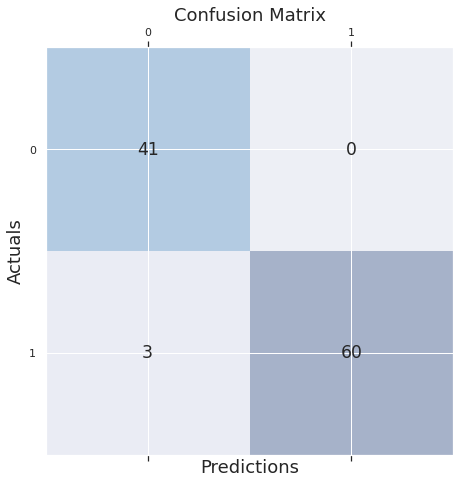

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
conf_matrix = confusion_matrix(y_true=y_real, y_pred=preds2)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
acc = accuracy_score(y_real, preds2)*100
print( f"Accuracy for the Model is {acc}%")

Accuracy for the Model is 97.11538461538461%
